In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define Functions

In [7]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.
    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.
    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.
    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()

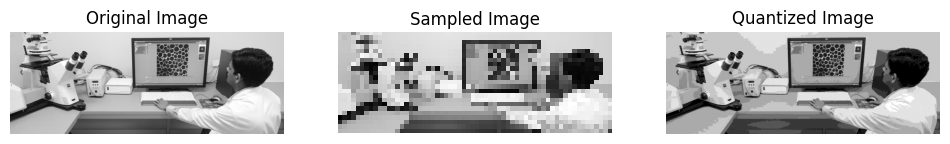

In [8]:
image_path='../media/bio.jpg'
sampling_factor=14
quantization_levels=9

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)


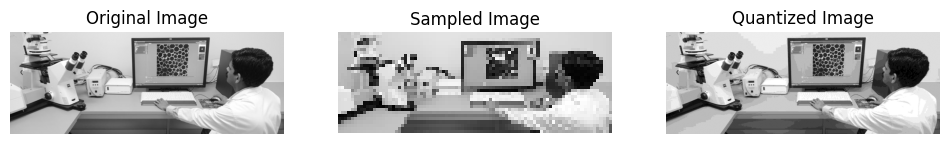

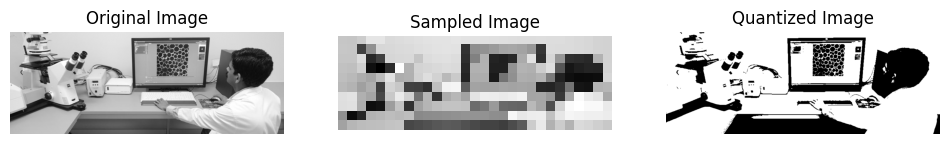

In [9]:
# Task 1
samp_1 = sample_image(original_image, 10)
samp_2 = sample_image(original_image, 30)

quant_1 = quantize_image(original_image, 16)
quant_2 = quantize_image(original_image, 2)
plot_images(original_image, samp_1,quant_1)
plot_images(original_image, samp_2,quant_2)

# Arithmetic Operations

In [12]:
from PIL import Image
img1=Image.open('/media/bio.jpg')
img2=Image.open ('/media/iau.jpg')

resize=(400,400)
img1=img1.resize(resize,Image.Resampling.LANCZOS)
img2=img2.resize(resize,Image.Resampling.LANCZOS)

im1arr=np.asarray(img1)
im2arr=np.asarray(img2)
addition=im1arr+im2arr

resultImage=Image.fromarray(addition)

In [14]:
# Task 2
import numpy as np
img1=Image.open('/media/bio.jpg')
img1=img1.resize(resize,Image.Resampling.LANCZOS)
im1arr=np.asarray(img1)
addition2= im1arr + 175

resultImage2=Image.fromarray(addition2)

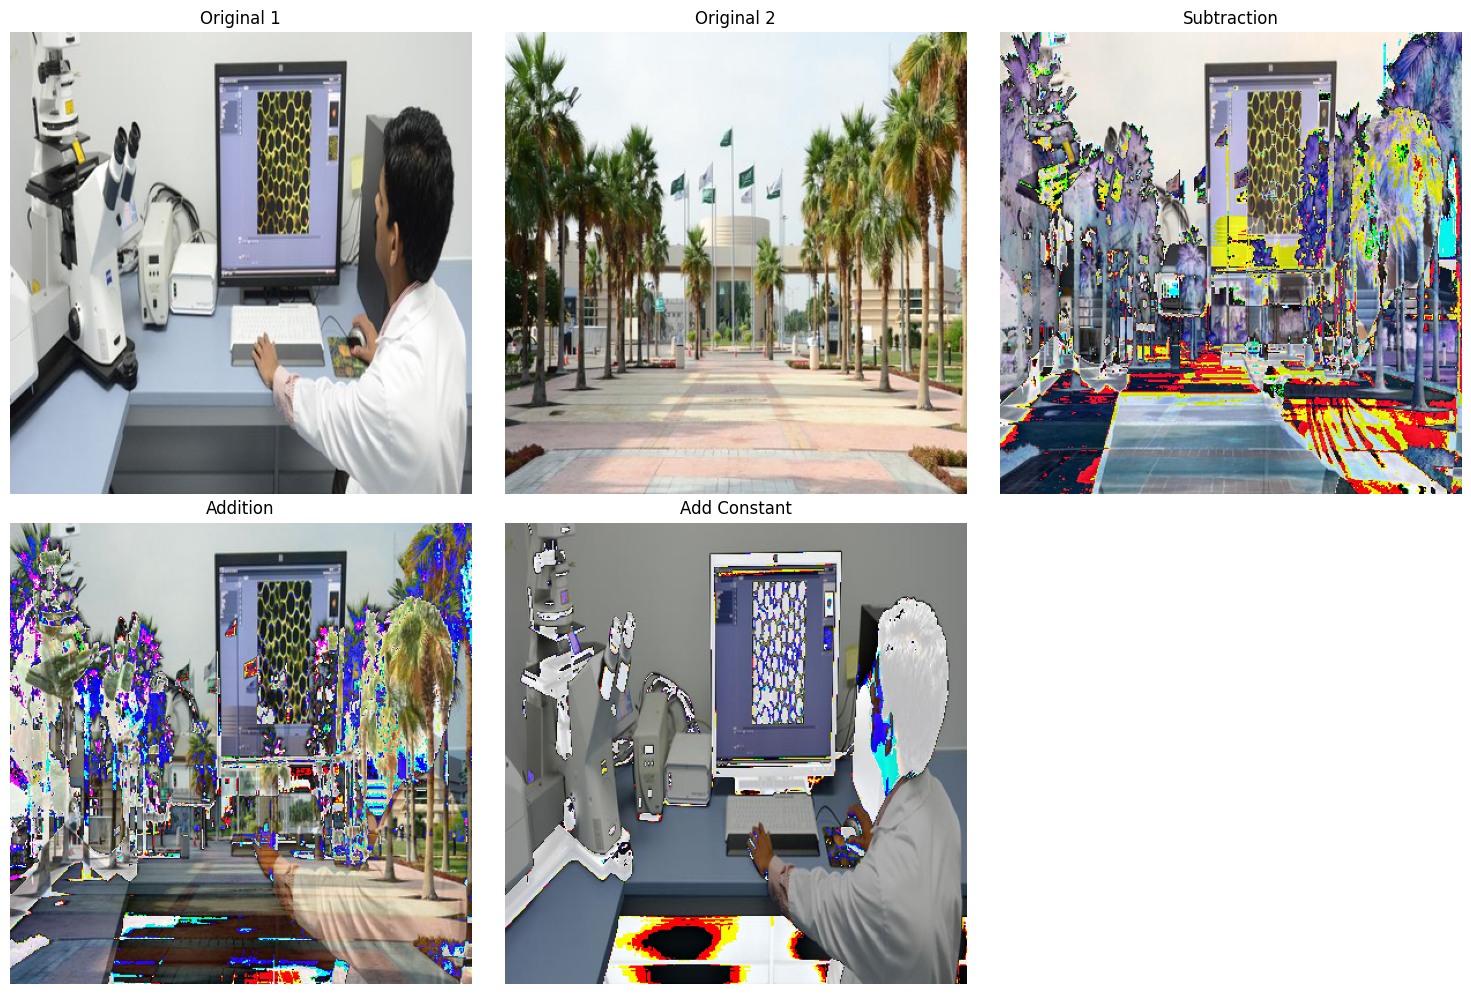

In [17]:
# Task 2
subtraction =im1arr - im2arr

resultImage3=Image.fromarray(subtraction)

titles = ['Original 1', 'Original 2', 'Subtraction', 'Addition','Add Constant']
images = [img1, img2, subtraction, addition, addition2]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Sets and Logical Operations

In [18]:
img3=Image.open('../media/iau.jpg')
img3.show()
img4=Image.open('../media/bio.jpg')
img4.show()

resize=(400,400)
img3=img3.resize(resize,Image.Resampling.LANCZOS)
img4=img4.resize(resize,Image.Resampling.LANCZOS)

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

union=im4arr|im3arr
resultImage4=Image.fromarray(union)

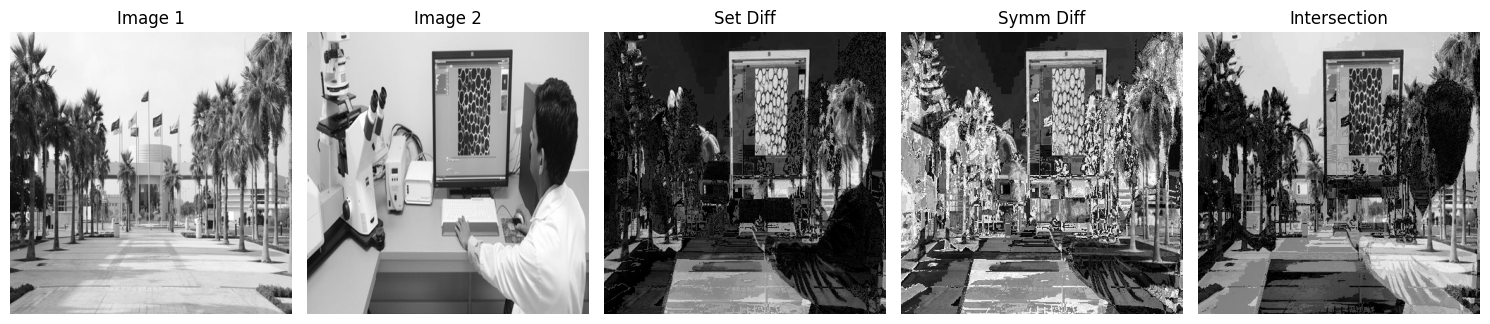

In [21]:
img5=img3.convert('L')
img6=img4.convert('L')

resize=(400,400)
img5=img5.resize(resize,Image.Resampling.LANCZOS)
img6=img6.resize(resize,Image.Resampling.LANCZOS)

im5arr=np.asarray(img5)
im6arr=np.asarray(img6)

set_diff = im5arr & (~im6arr)
resultImage5=Image.fromarray(set_diff)


sym_diff = im5arr ^ im6arr
resultImage6=Image.fromarray(sym_diff)

intersection = im5arr & im6arr
resultImage7=Image.fromarray(intersection)

titles = ['Image 1', 'Image 2', 'Set Diff', 'Symm Diff', 'Intersection']
images = [img5, img6, set_diff, sym_diff, intersection]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
